# RTF Model for predicting zone with Peaks - Vibrations

Import

In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.fft import fft
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ReadCsv function

Colonnes du fichier /Users/vincentdamery/Desktop/projet_vibration/ModelMLAgeRacket/Data_Clean/Chanel0_Data_Columns/P1_clean/RB/P1_RB_2_S.matImpactN3.csv : (2401, 1)


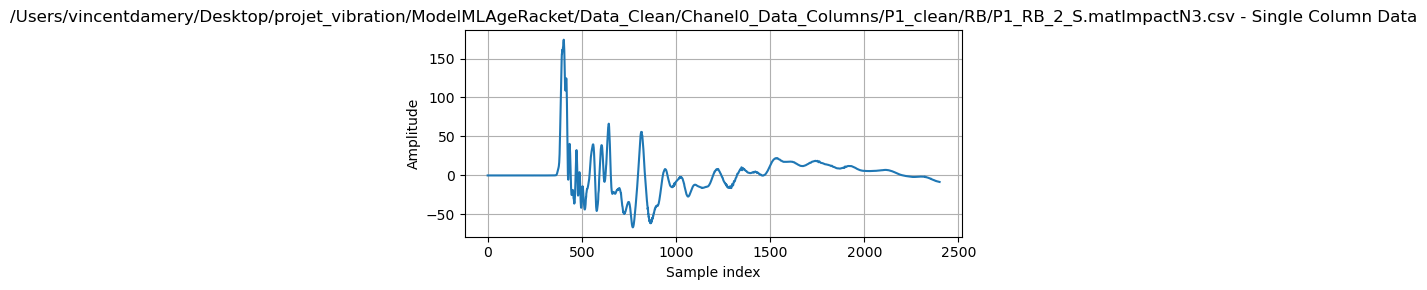

Colonnes du fichier /Users/vincentdamery/Desktop/projet_vibration/ModelMLAgeRacket/Data_Clean/Chanel0_Data_Columns/P1_clean/RB/P1_RB_2_S.matImpactN2.csv : (2401, 1)


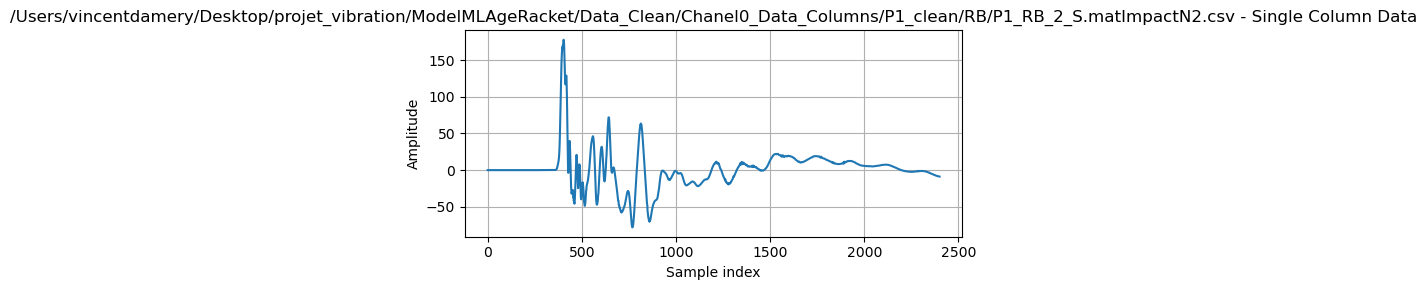

In [2]:
def readCsvFolder(folder_path, with_data=True):
    files = []
    data = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            full_path = os.path.join(folder_path, filename)
            files.append(full_path)
            if with_data:
                try:
                    df = pd.read_csv(full_path, header=None)
                    data.append(df)
                except Exception as e:
                    print(f"Erreur en lisant {full_path} : {e}")
    return (data, files) if with_data else files


# Lecture des fichiers
csv_data_list, filenames = readCsvFolder("/Users/vincentdamery/Desktop/projet_vibration/ModelMLAgeRacket/Data_Clean/Chanel0_Data_Columns/P1_clean/RB")

# Affichage
for i,csv_data in enumerate(csv_data_list[:2]):
    print(f"Colonnes du fichier {filenames[i]} :",csv_data.shape)

    plt.figure(figsize=(6, 3))
    if csv_data.shape[1] >= 2:
        time_axis = range(len(csv_data.iloc[:, 1]))  # Pas de vraie échelle de temps si on ne l'a pas
        plt.plot(time_axis, csv_data.iloc[:, 1], label="Amplitude")
        plt.xlabel("Sample index")
        plt.ylabel("Amplitude")
        plt.title(f"{filenames[i]} - Channel 1")
    else:
        plt.plot(csv_data.iloc[:, 0])
        plt.title(f"{filenames[i]} - Single Column Data")
        plt.xlabel("Sample index")
        plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Spectrum

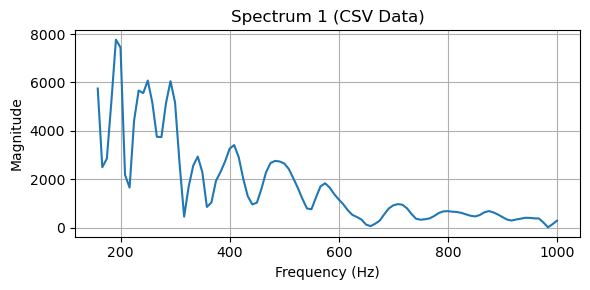

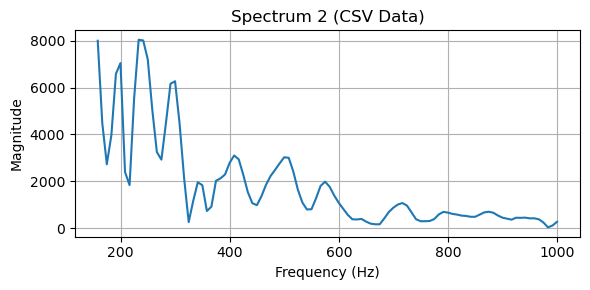

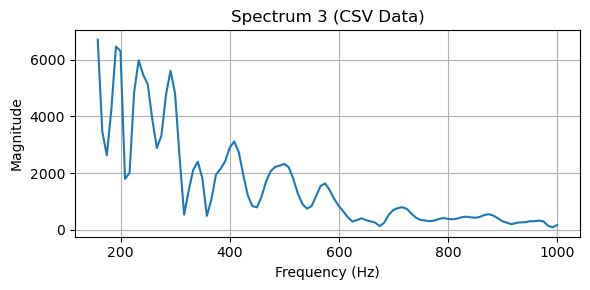

In [3]:
def spectrumFromCsv(csv_data, sample_rate):
    """Calcule le spectre à partir d'un signal CSV"""
    signal = csv_data.iloc[:, 0].values  # extrait la colonne souhaitée
    spectrum = fft(signal)
    magnitude = abs(spectrum[:len(spectrum) // 2])
    freqs = np.fft.fftfreq(len(signal), d=1/sample_rate)[:len(spectrum) // 2]
    return freqs, magnitude

sample_rate = 20000

spectrumVect = []

for csv_data in csv_data_list:
    freqs, spectrum = spectrumFromCsv(csv_data, sample_rate)
    # Filtrage de la bande [150 Hz, 1000 Hz]
    band_mask = (freqs >= 150) & (freqs <= 1000)
    filtered_freqs = freqs[band_mask]
    filtered_spectrum = spectrum[band_mask]
    spectrumVect.append((filtered_freqs, filtered_spectrum))


# Visualisation des spectres pour les données CSV
for idx, (freqs, spectrum) in enumerate(spectrumVect[:3]):
    plt.figure(figsize=(6, 3))
    plt.plot(freqs, spectrum)
    plt.title(f"Spectrum {idx + 1} (CSV Data)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Extract each peak and store

In [4]:
def extractNPeak(n_peak,signal):
    # Find peaks in the signal
    peaks = np.argsort(signal)[-n_peak:]  # Get indices of the n largest peaks
    peaks = np.sort(peaks)  # Sort the indices in ascending order

    # Extract the peak values
    peak_values = signal[peaks]

    return peaks, peak_values


# Fonction pour lire les fichiers d'un dossier donné
def lire_fichiers_dossier(dossier):
    if os.path.exists(dossier):  # Vérifier si le dossier existe
        return readCsvFolder(dossier)
    else:
        print(f"Dossier introuvable : {dossier}")
        return [], [], []  # Retourne des listes vides si le dossier n'existe pas


## Main

In [ ]:

# Liste des types de raquettes
raquetteTypeList = {"RB": 0, "RO": 1, "RR": 2, "RV": 3}



allCsvFile = []
allCsvFileLabel = []
allCsvFileP1 = []

# Fonction pour lire les fichiers .csv dans un dossier
def readCsvFolder(folder_path):
    files = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            files.append(os.path.join(folder_path, filename))
    return files

# Charger les fichiers P1
for raquetteType in raquetteTypeList:
    fileFolderP1 = readCsvFolder(f"/Users/vincentdamery/Desktop/projet_vibration/ModelMLAgeRacket/Data_Clean/Chanel0_Data_Columns/P1_clean/{raquetteType}")
    allCsvFileP1.extend(fileFolderP1)

print("Len(allCsvFileP1)", len(allCsvFileP1))

# Récupérer les labels en inspectant le nom du fichier
for i in range(len(allCsvFileP1)):
    file_path = allCsvFileP1[i]
    file_name = os.path.basename(file_path)

    # Détection simple de la zone d'impact
    if 'C' in file_name:
        zone = 'C'
    elif 'S' in file_name:
        zone = 'S'
    elif 'V' in file_name:
        zone = 'V'


    allCsvFile.append(file_path)
    allCsvFileLabel.append(f"{zone}")

    
for i in range(len(allCsvFileLabel)):
    print(allCsvFileLabel[i])


Len(allCsvFileP1) 208
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
V
C
C
V
V
V
C
C
V
C
V
V
C
C
V
C
V
C
C
V
V
C
V
C
V
C
V
V
C
C
V
C
V
V
C
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
V
V
C
V
C
V
C
V
V
C
C
C
V
V
C
V
C
V
C
V
C
C
V
V
V
C
C
V
C
V
C
V
C
C
V
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
V
C
V
V
C
C
C
V
V
C
V
C
V
V
C
C
V
V
C
C
V
C
V
C
V
C
C
V
V
C
V
V
C
C
V
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
C
V
V
C
V
C
V
C
V
V
C
C
C
V
V
C
V
C
V
C
V
C
C
V
V
V
C
C
V
C
V
C
V
C
C
V


In [ ]:

# Liste des types de raquettes
raquetteTypeList = {"RB": 0, "RO": 1, "RR": 2, "RV": 3}



allCsvFile = []
allCsvFileLabel = []
allCsvFileP1 = []
results = []

# Fonction pour lire les fichiers .csv dans un dossier
def readCsvFolder(folder_path):
    files = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            files.append(os.path.join(folder_path, filename))
    return files

# Charger les fichiers P1
for raquetteType in raquetteTypeList:
    fileFolderP1 = readCsvFolder(f"/Users/vincentdamery/Desktop/projet_vibration/ModelMLAgeRacket/Data_Clean/Chanel0_Data_Columns/P1_clean/{raquetteType}")
    allCsvFileP1.extend(fileFolderP1)

print("Len(allCsvFileP1)", len(allCsvFileP1))

# Récupérer les labels en inspectant le nom du fichier
for i in range(len(allCsvFileP1)):
    file_path = allCsvFileP1[i]
    file_name = os.path.basename(file_path)

    # Détection simple de la zone d'impact
    if 'C' in file_name:
        zone = 'C'
    elif 'S' in file_name:
        zone = 'S'
    elif 'V' in file_name:
        zone = 'V'


    allCsvFile.append(file_path)
    allCsvFileLabel.append(f"{zone}")
    
for n_peak in range(10,101,5):
    bestPeakHZAllCsvFile = []
    bestPeakAmplitudeAllCsvFile = []
        
    for csvFile in allCsvFile:
        # Lire le fichier CSV
        try:
            data = pd.read_csv(csvFile, header=None)
        except Exception as e:
            print(f"Erreur avec le fichier {csvFile} : {e}")
            continue

        # Compute the spectrum using FFT
        freqs, spectrum = spectrumFromCsv(data, sample_rate)

        # Extract peaks from the spectrum
        peaks_HZ, peak_Amplitude = extractNPeak(n_peak, spectrum)
        
        peak_freqs = freqs[peaks_HZ]


        # Normaliser les amplitudes des pics (si max ≠ 0)
        if np.max(peak_Amplitude) > 0:
            peak_Amplitude = peak_Amplitude / np.max(peak_Amplitude)

        bestPeakHZAllCsvFile.append(peaks_HZ)
        bestPeakAmplitudeAllCsvFile.append(peak_Amplitude)

    # Combine features into X
    X = np.hstack([np.array(bestPeakHZAllCsvFile), np.array(bestPeakAmplitudeAllCsvFile)])

    # Encode string labels into integers
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(allCsvFileLabel)

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Définir les bonnes valeurs trouvé
    n_estimators_range = [10, 50, 100]
    max_depth_range = [None, 10, 20, 30]
    min_samples_split_range = [2, 5, 10]

        
    # Tester toutes les combinaisons d'hyperparamètres
    for n_estimators in n_estimators_range:
        for max_depth in max_depth_range:
            for min_samples_split in min_samples_split_range:
                rf = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    random_state=42
                )
                rf.fit(X_train, y_train)
                y_pred = rf.predict(X_test)
                y_train_pred = rf.predict(X_train)

                results.append({
                    'n_peak' : n_peak,
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'accuracy_train': accuracy_score(y_train, y_train_pred),
                    'accuracy_test': accuracy_score(y_test, y_pred)
                })

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)

# Enregistrer les résultats dans un fichier Excel
results_df.to_excel("V_RTF_Position_P1_Peaks.xlsx", index=False)

print("Results have been saved to 'V_RTF_Position_P1_Peaks.xlsx'.")

# Trier les résultats par ordre décroissant de 'accuracy_test'
sorted_results_df = results_df.sort_values(by='accuracy_test', ascending=False)

# Afficher les résultats triés
print(sorted_results_df)



Extract peaks

In [6]:
bestPeakHZAllCsvFile = []
bestPeakAmplitudeAllCsvFile = []
n_peak = 25

for csvFile in allCsvFile:
    # Lire le fichier CSV
    try:
        data = pd.read_csv(csvFile, header=None)
    except Exception as e:
        print(f"Erreur avec le fichier {csvFile} : {e}")
        continue

    # Compute the spectrum using FFT
    freqs, spectrum = spectrumFromCsv(data, sample_rate)

    # Extract peaks from the spectrum
    peaks_HZ, peak_Amplitude = extractNPeak(n_peak, spectrum)
    
    peak_freqs = freqs[peaks_HZ]


    # Normaliser les amplitudes des pics (si max ≠ 0)
    if np.max(peak_Amplitude) > 0:
        peak_Amplitude = peak_Amplitude / np.max(peak_Amplitude)

    bestPeakHZAllCsvFile.append(peaks_HZ)
    bestPeakAmplitudeAllCsvFile.append(peak_Amplitude)

print(np.array(bestPeakHZAllCsvFile).shape)
print(np.array(bestPeakAmplitudeAllCsvFile).shape)



(208, 25)
(208, 25)


In [7]:
# Combine features into X
X = np.hstack([np.array(bestPeakHZAllCsvFile), np.array(bestPeakAmplitudeAllCsvFile)])

# Encode string labels into integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(allCsvFileLabel)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Définir les bonnes valeurs trouvé
n_estimators_range = [10, 50, 100]
max_depth_range = [None, 10, 20, 30]
min_samples_split_range = [2, 5, 10]

    
# Tester toutes les combinaisons d'hyperparamètres
for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        for min_samples_split in min_samples_split_range:
            rf = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=42
            )
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            y_train_pred = rf.predict(X_train)

            results.append({
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'accuracy_train': accuracy_score(y_train, y_train_pred),
                'accuracy_test': accuracy_score(y_test, y_pred)
            })

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)

# Enregistrer les résultats dans un fichier Excel
results_df.to_excel("RTF_AGE_P1.P2.P3_Peaks.xlsx", index=False)

print("Results have been saved to 'RTF_AGE_P1.P2.P3_Peaks.xlsx'.")

# Trier les résultats par ordre décroissant de 'accuracy_test'
sorted_results_df = results_df.sort_values(by='accuracy_test', ascending=False)

# Afficher les résultats triés
print(sorted_results_df)

Results have been saved to 'RTF_AGE_P1.P2.P3_Peaks.xlsx'.
    n_estimators  max_depth  min_samples_split  accuracy_train  accuracy_test
0             10        NaN                  2             1.0            1.0
1             10        NaN                  5             1.0            1.0
52            50       10.0                  5             1.0            1.0
51            50       10.0                  2             1.0            1.0
50            50        NaN                 10             1.0            1.0
..           ...        ...                ...             ...            ...
23            50       30.0                 10             1.0            1.0
22            50       30.0                  5             1.0            1.0
21            50       30.0                  2             1.0            1.0
20            50       20.0                 10             1.0            1.0
71           100       30.0                 10             1.0            1.0

[72 r

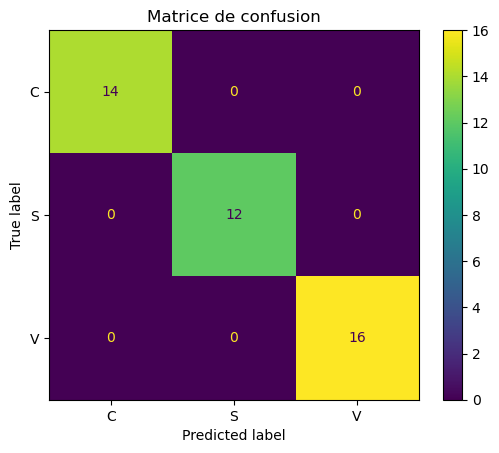

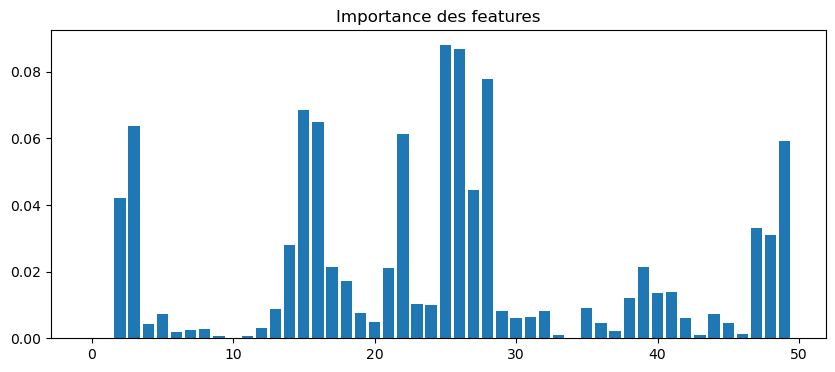

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

# Afficher la matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_encoder.classes_)
plt.title("Matrice de confusion")
plt.show()

importances = rf.feature_importances_
plt.figure(figsize=(10, 4))
plt.bar(range(len(importances)), importances)
plt.title("Importance des features")
plt.show()
